In [820]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [821]:
df = pd.read_csv("data/german_credit.csv")
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [822]:
age_mean = int(df['Age'].mean().round())
print('Średnia wieku osób biorących kredyt wynosi {} lat.'.format(age_mean))

age_median = int(df['Age'].median().round())
print('Mediana wieku osób biorących kredyt wynosi {} lat'.format(age_median))

age_std = df['Age'].std().round(2)
print('Odchylenie standardowe dla wieku kredytobiorców wynosi {}.\n'.format(age_std))

amount_mean = df['Credit amount'].mean().round(2)
print('Średnia wysokość kredytu wynosi {} marek niemieckich.'.format(amount_mean))

amount_median = df['Credit amount'].median().round(2)
print('Mediana wysokości kredytu wynosi {} marek niemieckich'.format(amount_median))

amount_std = df['Credit amount'].std().round(2)
print('Odchylenie standardowe wysokości kredytu jest równe {}.\n'.format(amount_std))

duration_mean = int(df['Duration'].mean().round())
print('Średnia długość spłaty kredytu wynosi {} miesięcy.'.format(duration_mean))

duration_median = int(df['Duration'].median().round())
print('Mediana długości spłaty kredytu wynosi {} miesięcy'.format(duration_median))

duration_std = df['Duration'].std().round(2)
print('Odchylenie standardowe dla długości spłaty kredytu wynosi {}.'.format(duration_std))

Średnia wieku osób biorących kredyt wynosi 36 lat.
Mediana wieku osób biorących kredyt wynosi 33 lat
Odchylenie standardowe dla wieku kredytobiorców wynosi 11.38.

Średnia wysokość kredytu wynosi 3271.26 marek niemieckich.
Mediana wysokości kredytu wynosi 2319.5 marek niemieckich
Odchylenie standardowe wysokości kredytu jest równe 2822.74.

Średnia długość spłaty kredytu wynosi 21 miesięcy.
Mediana długości spłaty kredytu wynosi 18 miesięcy
Odchylenie standardowe dla długości spłaty kredytu wynosi 12.06.


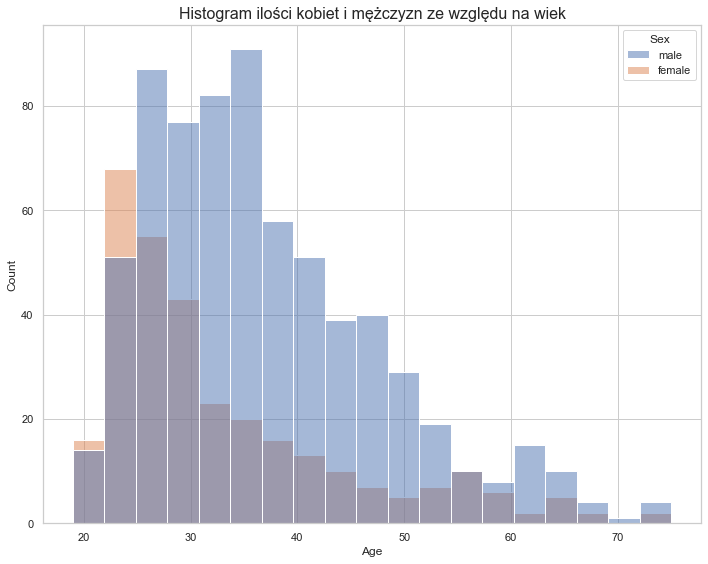

In [823]:
basic_palette = ['blue', 'red']

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))

hist = sns.histplot(x='Age', hue='Sex', data=df)
hist.set_title("Histogram ilości kobiet i mężczyzn ze względu na wiek", fontsize=16)
plt.tight_layout()

Na powyższym histogramie widać, że w zbiorze danych przewyższają osoby młode.

Ponadto jest zdecydowanie więcej mężczyzn, niż kobiet. Taka sytuacja występuje w przypadku prawie każdego wieku. Wyjątkiem są osoby młode, gdzie kobiet jest niewiele więcej.

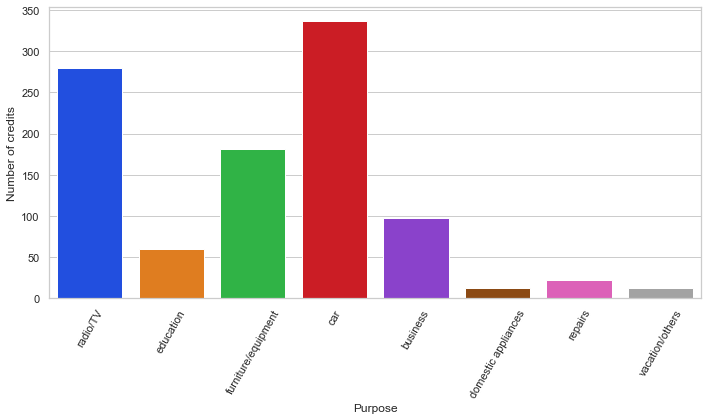

In [824]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

bar = sns.countplot(x="Purpose", data=df, palette='bright')
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of credits")
plt.tight_layout()

Na powyższym wykresie słupkowym można dostrzec, że najwięcej kredytów jest zaciąganych na zakup samochodu, natomiast najmniej na sprzęt AGD oraz wakacje.

[Text(0, 0, 'radio/TV'),
 Text(1, 0, 'education'),
 Text(2, 0, 'furniture/equipment'),
 Text(3, 0, 'car'),
 Text(4, 0, 'business'),
 Text(5, 0, 'domestic appliances'),
 Text(6, 0, 'repairs'),
 Text(7, 0, 'vacation/others')]

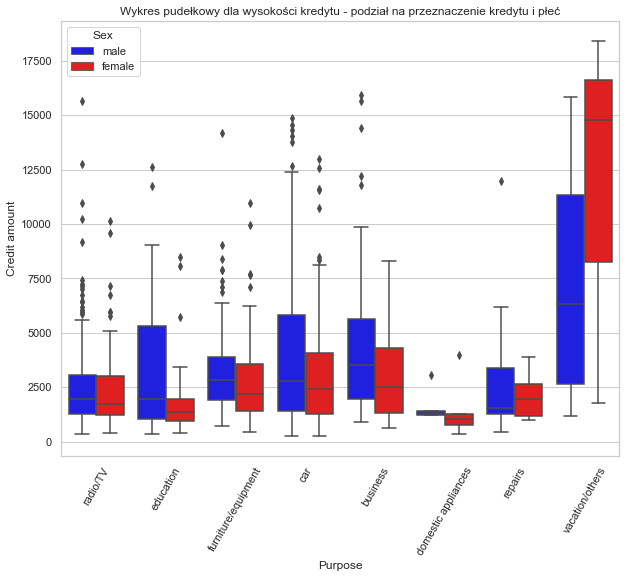

In [825]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
box = sns.boxplot(x='Purpose', y='Credit amount', hue='Sex', data=df, palette=basic_palette)
box.set_title('Wykres pudełkowy dla wysokości kredytu - podział na przeznaczenie kredytu i płeć')
box.set_xticklabels(box.get_xticklabels(),rotation=60)

Z wykresu powyżej możemy odczytać, że średnio najwyższe kredyty są zaciągane na wakacje lub inne, nieuwzględnione potrzeby. Wartość ta jest zdecydowanie wyższa w przypadku kobiet, niż mężczyzn.

Warto jednak zauważyć, że takich kredytów jest bardzo mało, przez co wynik może być obarczony wysoką niepewnością.

Warto zwrócić uwagę na słupek przedstawiający średnią wysokość kredytów na edukację. W tym przypadku to mężczyźni biorą wyższe kredyty, niż kobiety.

Najniższe kredyty, zarówno w przypadku mężczyzn i kobiet, są zaciągane na sprzęt AGD.

Text(0.5, 1.0, 'Histogram wysokości kredytu i długości spłaty - podział na płeć')

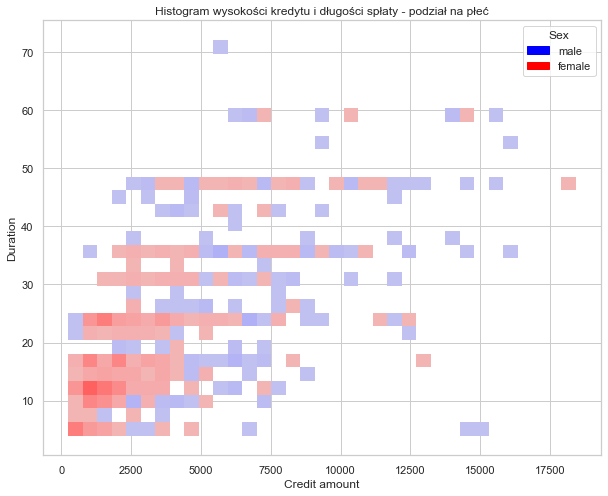

In [826]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
box2 = sns.histplot(x='Credit amount', y='Duration', data=df, hue='Sex', palette=basic_palette)
box2.set_title('Histogram wysokości kredytu i długości spłaty - podział na płeć')

Na histogramie można dostrzec wzrost długości spłaty wraz ze wzrostem wysokości kredytu.

Trend jest widoczny dla obu płci, jednak w przypadku mężczyzn jest on minimalnie mniejszy - długość spłaty nie wzrasta tak szybko, jak w przypadku kobiet.

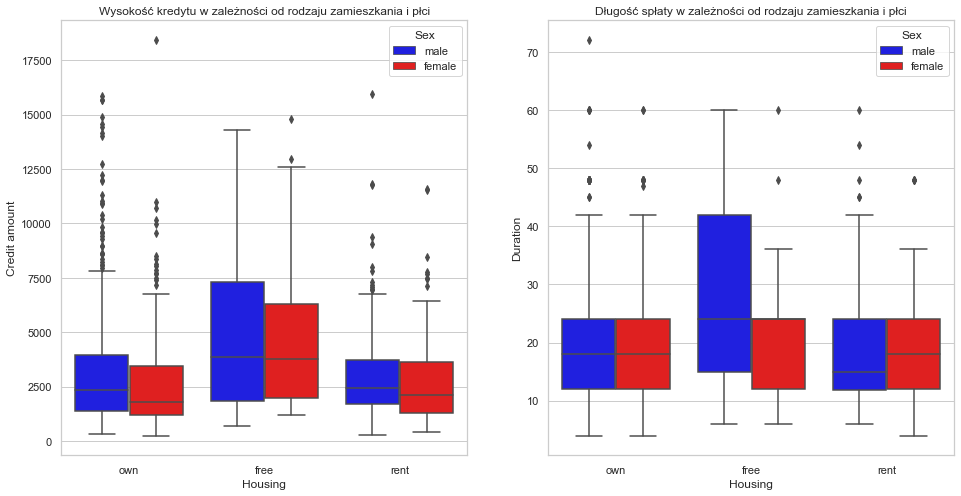

In [827]:
fig, housing = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(ax=housing[0], x='Housing', y='Credit amount', hue='Sex', data=df, palette=basic_palette).set_title('Wysokość kredytu w zależności od rodzaju zamieszkania i płci')
sns.boxplot(ax=housing[1], x='Housing', y='Duration', hue='Sex', data=df, palette=basic_palette).set_title('Długość spłaty w zależności od rodzaju zamieszkania i płci')

plt.show()

Pierwszy wykres pokazuje, że w przypadku własnego i wynajmowanego mieszkania, wysokość kredytu jest niska bez względu na płeć.

Podobnie jest z długością spłaty kredytu.

Dla przypadków, gdy kredytobiorca ma darmowe mieszkanie, wysokość kredytu znacznie wzrasta.

Długość spłaty w przypadku posiadania darmowego mieszkania różni się znacząco dla kobiet i mężczyzn. Dla kobiet jest podobna, jak w przypadku swojego i wynajmowanego mieszkania, natomiast dla mężczyzn jest kilkukrotnie wyższa.


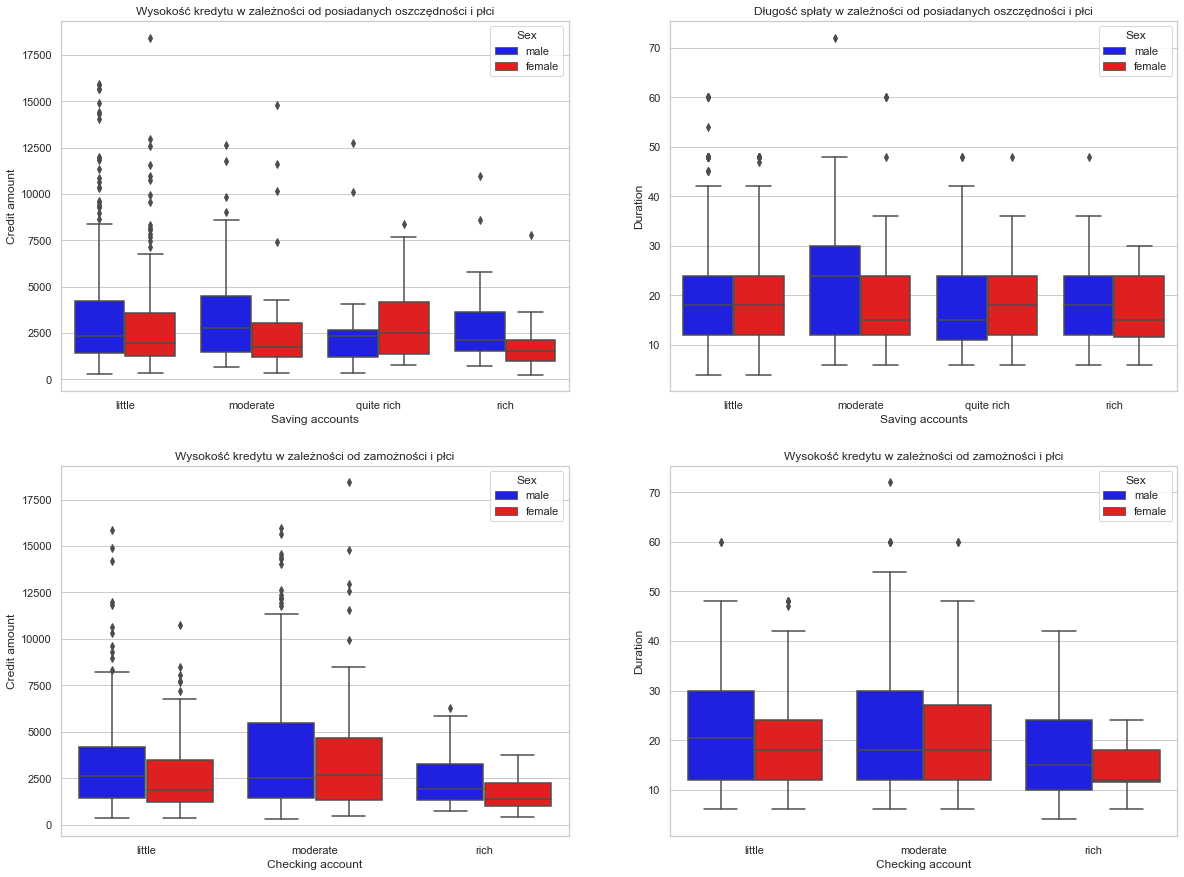

In [828]:
saving_order = ['little', 'moderate', 'quite rich', 'rich']
checking_order = ['little', 'moderate', 'rich']

fig, wealth = plt.subplots(2, 2, figsize=(20,15))

sns.boxplot(ax=wealth[0, 0], x='Saving accounts', y='Credit amount', hue='Sex', data=df, order=saving_order, palette=basic_palette).set_title('Wysokość kredytu w zależności od posiadanych oszczędności i płci')
sns.boxplot(ax=wealth[0, 1], x='Saving accounts', y='Duration', hue='Sex', data=df, order=saving_order, palette=basic_palette).set_title('Długość spłaty w zależności od posiadanych oszczędności i płci')
sns.boxplot(ax=wealth[1, 0], x='Checking account', y='Credit amount', hue='Sex', data=df, order=checking_order, palette=basic_palette).set_title('Wysokość kredytu w zależności od zamożności i płci')
sns.boxplot(ax=wealth[1, 1], x='Checking account', y='Duration', hue='Sex', data=df, order=checking_order, palette=basic_palette).set_title('Wysokość kredytu w zależności od zamożności i płci')

plt.show()

Patrząc na posiadane oszczędności i zamożność, można zauważyć, że wraz ze wzrostem zamożności, maleje wysokość kredytu i długość spłaty.

Są wyjątki, jak np. średnia wysokość kredytu dla trochę bogatych kobiet - jest jedną z najwyższych.